In [ ]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.dropna(inplace=True)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,3.0,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

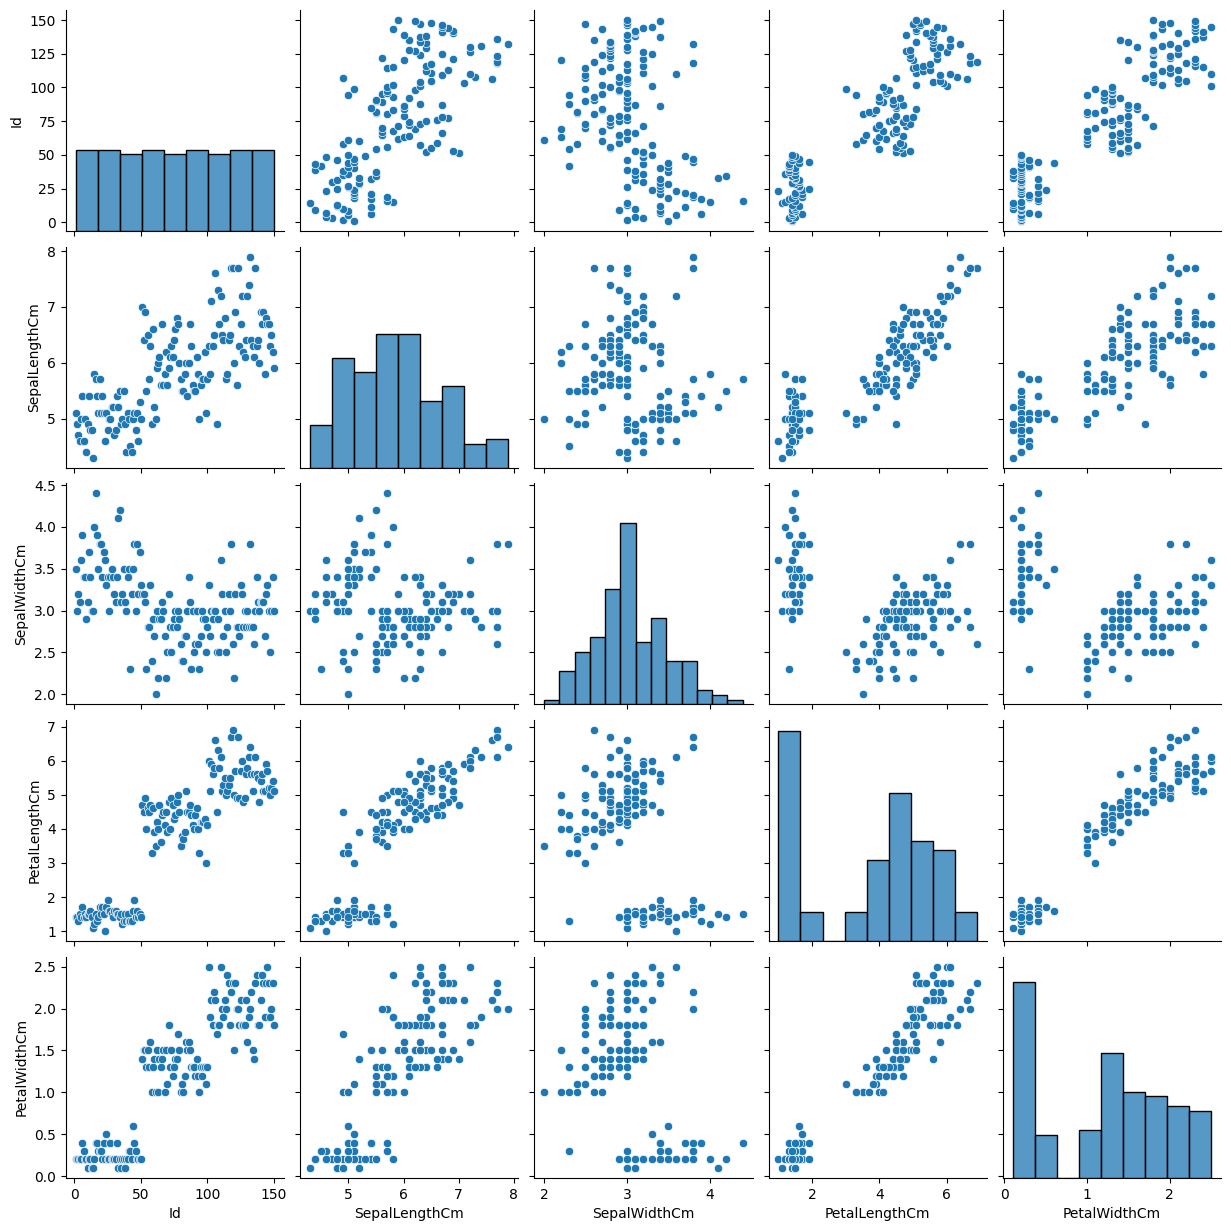

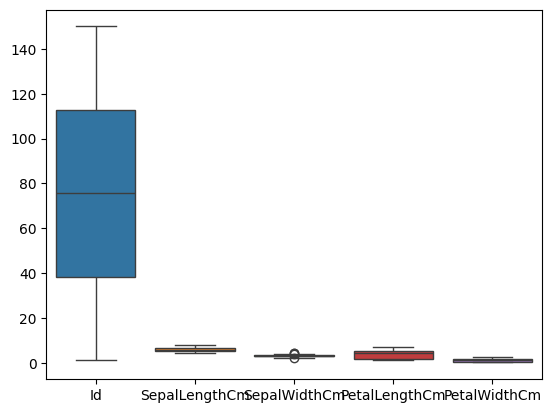

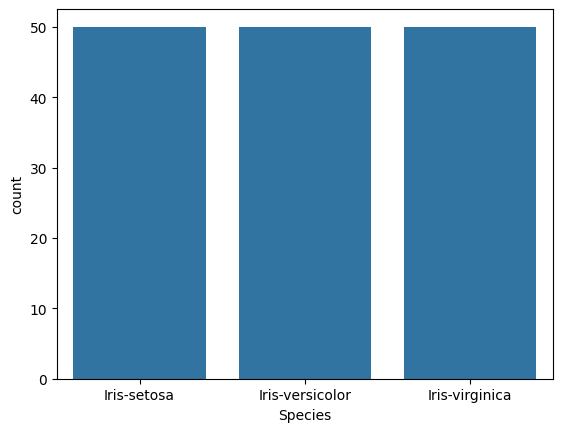

In [ ]:
statistics = df.describe()
sns.pairplot(df)
plt.show()

sns.boxplot(data=df)
plt.show()

sns.countplot(x='Species', data=df)
plt.show()


In [ ]:
pd.get_dummies(df)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,1.0,5.1,3.5,1.4,0.2,1,0,0
1,2.0,4.9,3.0,1.4,0.2,1,0,0
2,3.0,4.7,3.2,1.3,0.2,1,0,0
3,4.0,4.6,3.1,1.5,0.2,1,0,0
4,5.0,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...,...
147,146.0,6.7,3.0,5.2,2.3,0,0,1
148,147.0,6.3,2.5,5.0,1.9,0,0,1
149,148.0,6.5,3.0,5.2,2.0,0,0,1
150,149.0,6.2,3.4,5.4,2.3,0,0,1


In [ ]:
X = pd.get_dummies(df.drop('Species',axis=1),drop_first=True)
y = df['Species']

In [ ]:
X.shape


(150, 5)

In [ ]:
y.shape

(150,)

In [ ]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,5.1,3.5,1.4,0.2
1,2.0,4.9,3.0,1.4,0.2
2,3.0,4.7,3.2,1.3,0.2
3,4.0,4.6,3.1,1.5,0.2
4,5.0,5.0,3.6,1.4,0.2


In [ ]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

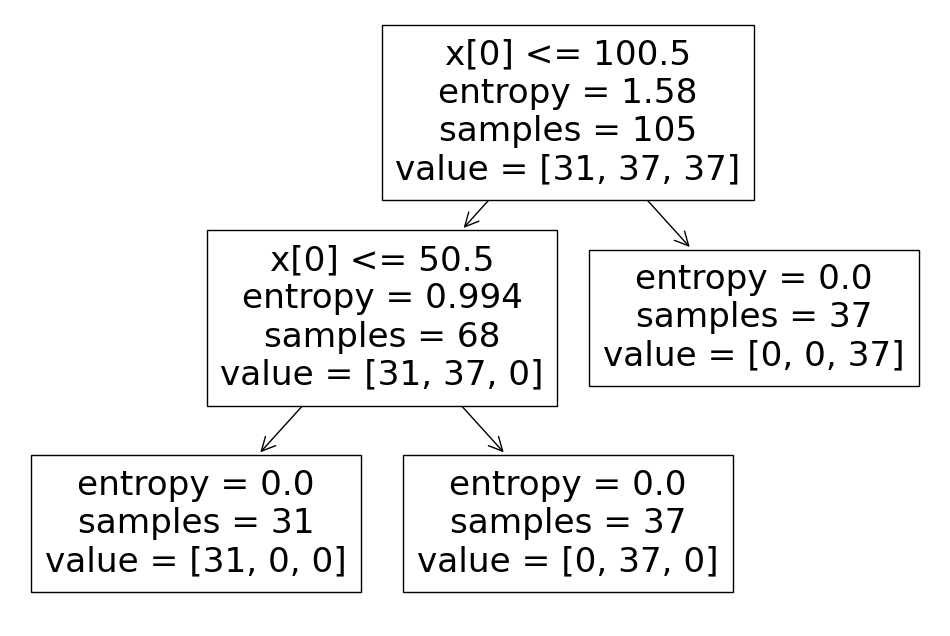

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model);

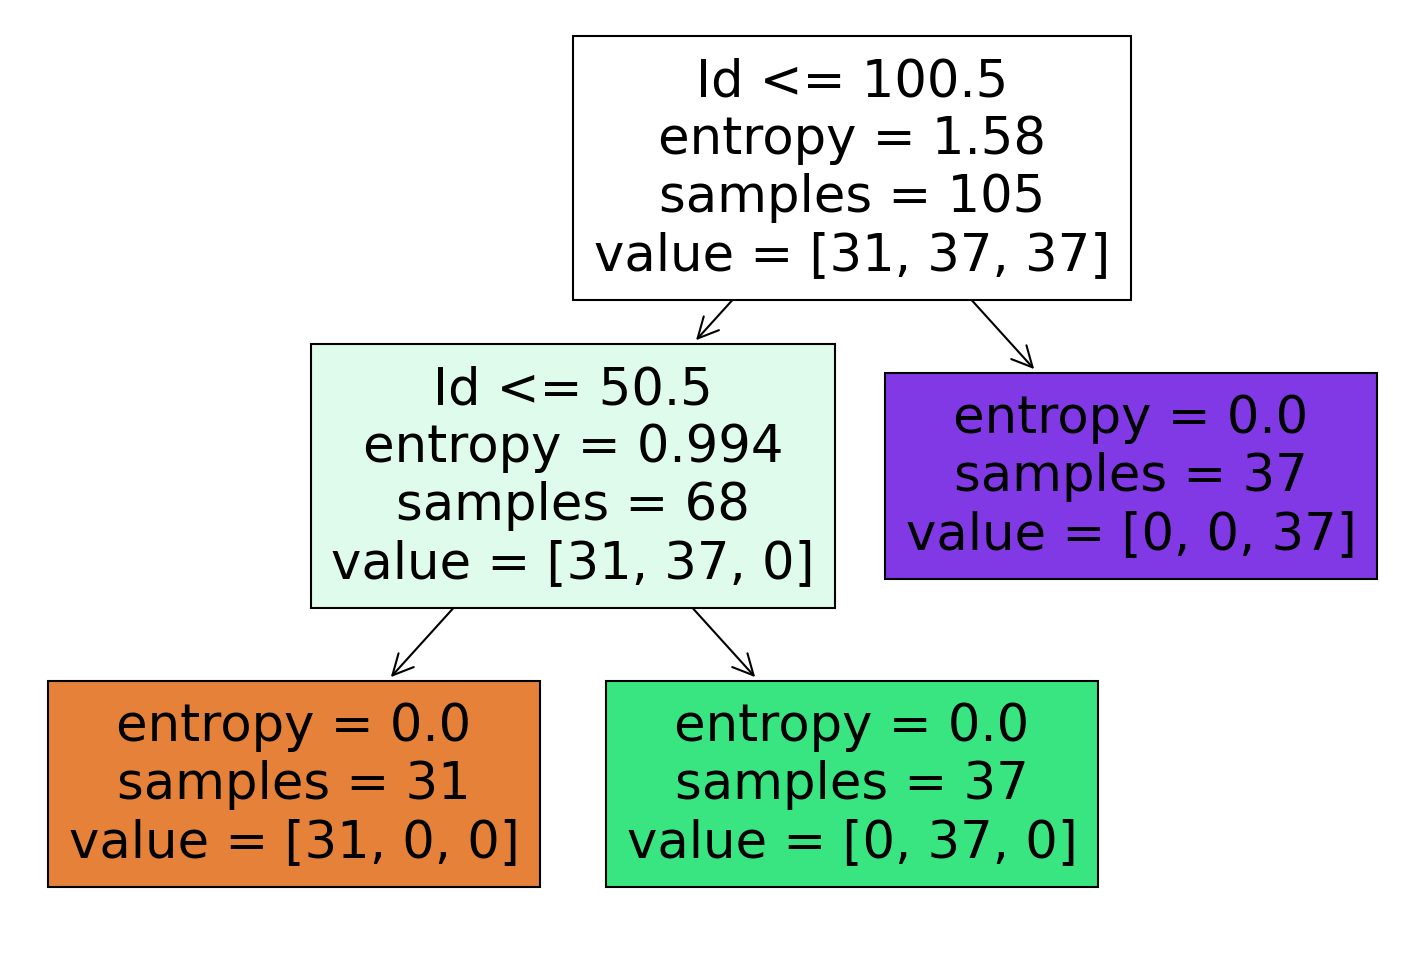

In [ ]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

In [ ]:
base_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_test,base_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

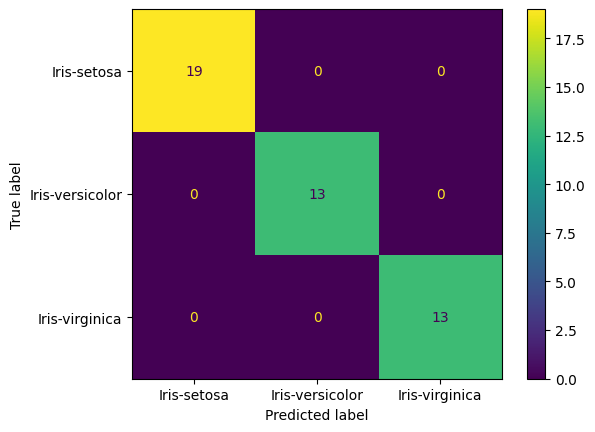

In [ ]:
disp.plot()

In [ ]:
print(classification_report(y_test,base_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
model.feature_importances_

array([1., 0., 0., 0., 0.])

In [ ]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Id,1.0
SepalLengthCm,0.0
SepalWidthCm,0.0
PetalLengthCm,0.0
PetalWidthCm,0.0


<Axes: xlabel='Species', ylabel='SepalLengthCm'>

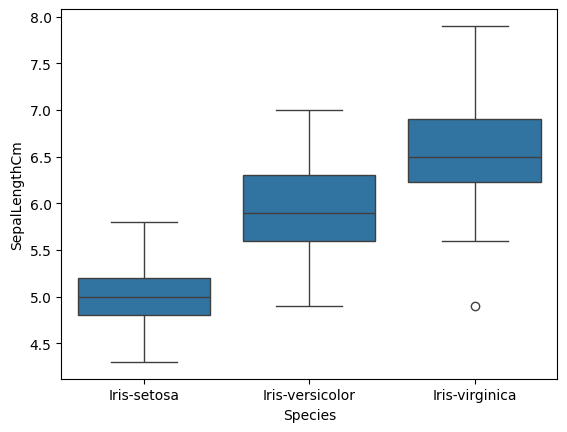

In [ ]:
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

In [ ]:
pruned_tree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45





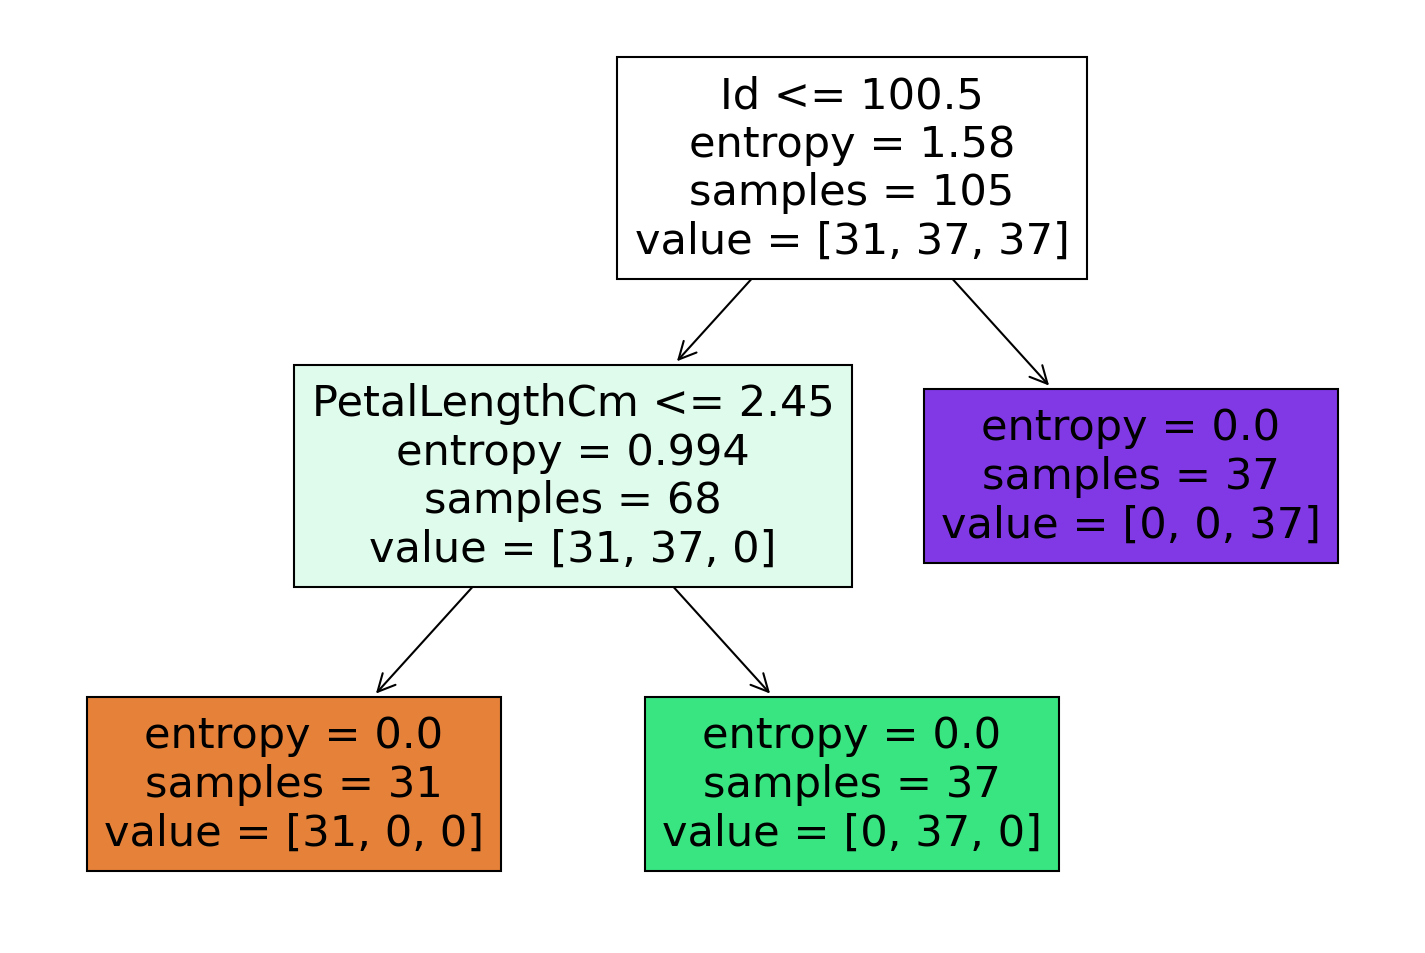

In [ ]:
report_model(pruned_tree)